In [1]:
from sklearn import datasets, tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проведите первичный анализ.

    a.Проверьте данные на пропуски. Удалите в случае обнаружения.

    b.*Нормализуйте один из признаков.


In [2]:
data = datasets.fetch_california_housing(as_frame=True).frame
data.shape

(20640, 9)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Датафрейм не имеет пропусков, удалять ничего не нужно

In [4]:
data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
houseAgeArray = np.array(data['HouseAge'])
houseAgeArray = preprocessing.normalize([houseAgeArray])

In [6]:
data['HouseAge'] = houseAgeArray[0]

In [7]:
data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,0.009123,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,0.004673,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,0.011570,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,0.011570,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,0.011570,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Обучите модель [регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на обучающем множестве.
5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [16]:
def get_score(X,y, random_seed=100, model=None, test_size=0.2, depth=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)
    if model is None:
        model = LinearRegression()
        model.fit(X_train, y_train)
        return model.score(X_test, y_test)
    if model == "DTR":
        if depth==None:
            model_part = DecisionTreeRegressor(max_depth=3)
            model_part.fit(X_train, y_train)
            fig = plt.figure(figsize=(25,20))
            _ = tree.plot_tree(model_part, feature_names=data.columns, filled=True)
            model = DecisionTreeRegressor()
            model.fit(X_train, y_train)
            return model.score(X_test, y_test)
        else:
            model = DecisionTreeRegressor(max_depth=depth)
            model.fit(X_train, y_train)
            fig = plt.figure(figsize=(25,20))
            _ = tree.plot_tree(model, feature_names=data.columns, filled=True)
            return model.score(X_test, y_test)


In [17]:
X = data.loc[:, data.columns != "MedHouseVal"]
y = data[["MedHouseVal"]]

In [18]:
get_score(X, y)

0.6223138107295079

6. Обучите [дерево решений](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) на обучающем множестве.

    a. Повторите п. 5 для полученной модели.

    b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по [ссылке](https://mljar.com/blog/visualize-decision-tree/).
7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.

    a. Повторите п. 5 для полученной модели.

0.6354220641956154

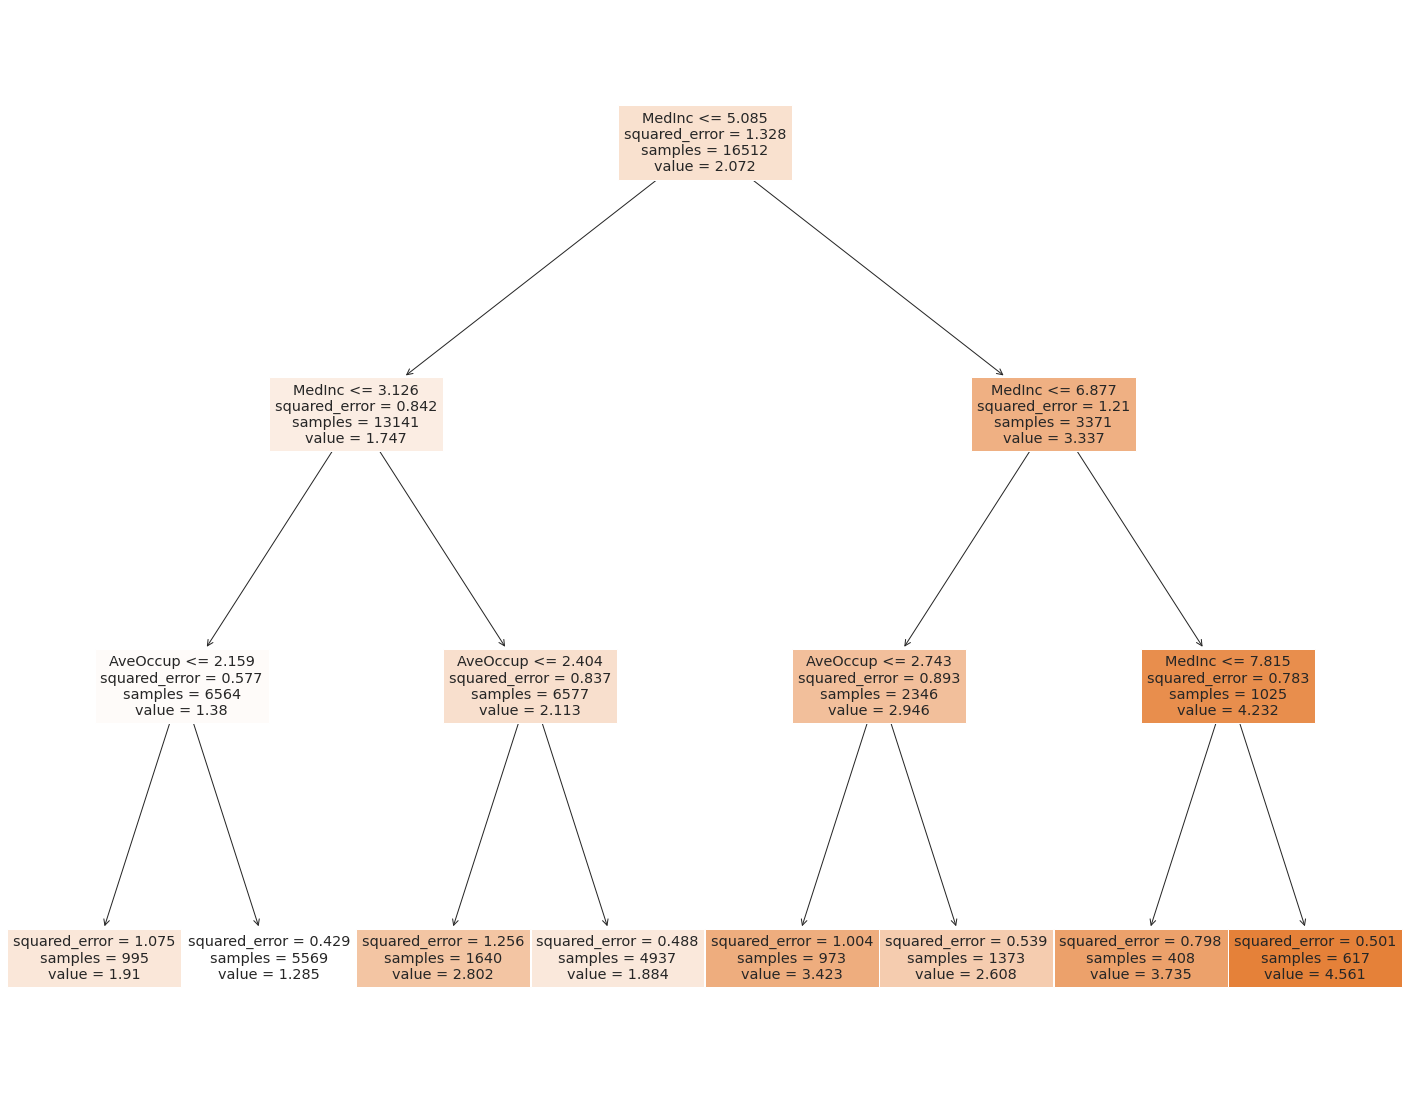

In [19]:
get_score(X, y, model="DTR")

(Имеем ввиду, что score в этом случае подсчитан без ограничения глубины, а часть дерева подсчитана с ограничением глубины)

0.457755892390421

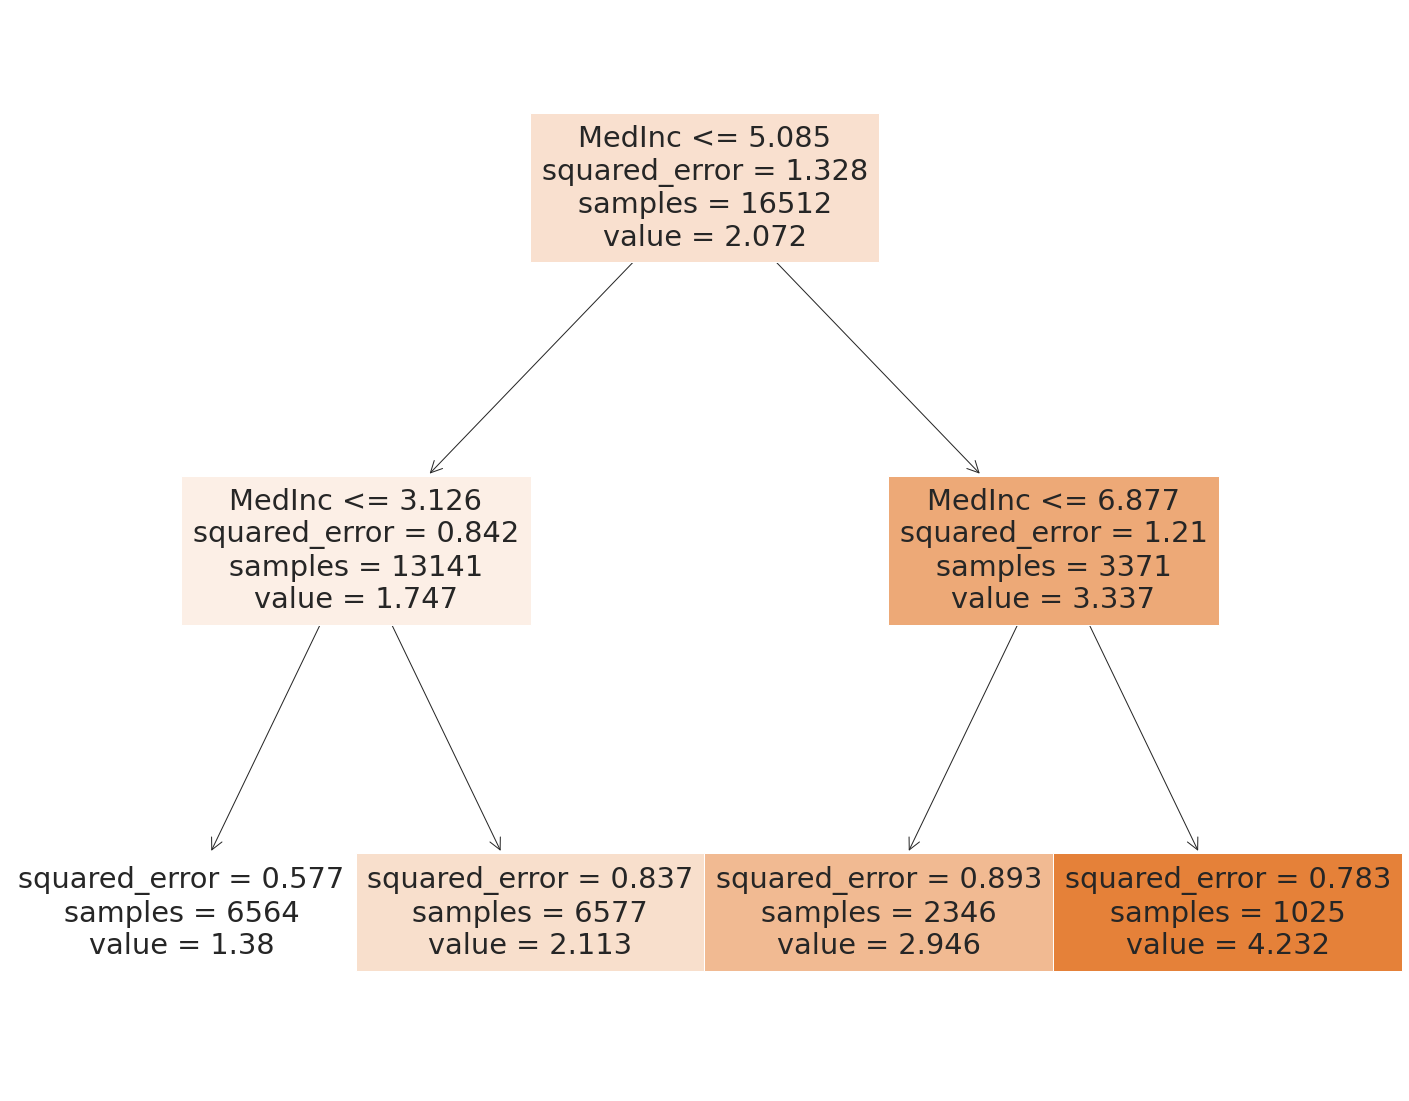

In [24]:
get_score(X, y, model="DTR", depth=2)

(А вот здесь я подсчитал уже и score и дерево с ограничением глубины)

8. Сформулируйте выводы по проделанной работе.

a. Сравните точность двух моделей.

b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

В использованном датасете дерево решений показало лучший результат, чем линейная регрессия именно в случае снятия ограничения на глубину дерева. При ограничении глубины точность может оказаться и хуже, смотря какую глубину взять. Это означает, что абсолютного преимущества перед регрессией дерево решений не имеет - преимущество может проявиться, а может и не проявиться. Дерево решений удобно использовать, когда исследуемая предметная модель плохо знакома дата инженеру и он не может делать сложных обоснованных разумных предположений, зато дерево позволяет на основе простого выбора ответов на простые вопросы к параметрам построить модель и без знания предметной модели. Также оно позволяет смешивать категориальные и числовые признаки. Также дерево жадное, и следовательно, неоптимальное, оно легко переобучается и чувствительно к шумам. В итоге всего этого я бы сказал, что дерево решений удобно применять для быстрого получения удовлетворительной модели, когда знаешь, что исходные данные не потребуется много раз менять и, значит, перестраивать модель, что затратно - когда нужно быстро получить одноразовое решение. Хотя на самом деле его можно использовать для любых в принципе задач, но я думаю, что очень оптимально его было бы применять в трудно формализуемых задачах, для которых можно только вот так, на основе цепи принятия решений, получить какой-то результат.